In [ ]:
import cv2
import os
import yaml
import sys
import numpy as np

sys.path.append("..")
from sfmv2 import SfMPipeline
from sfmv3 import StructureFromMotion
import matplotlib.pyplot as plt

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
config_path = os.path.join("..", "..", "..", "..", "configs", "lab3", "config.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
output_path = os.path.join("..", "..", "..", "..", "assets", "mazeweek1_frames")

In [ ]:
image_paths = [f"{output_path}/frame_{i:05d}.jpg" for i in range(10, 300)]
# sfm = SfM(config, image_paths)
sfm = StructureFromMotion(debug=False)

In [ ]:
refined_points_3d, refined_camera_poses = sfm.run(image_paths)

In [ ]:
image = cv2.imread(image_paths[190])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
plt.plot(np.array([refined_camera_poses[i][1][0] for i in range(200)]))
plt.show()

plt.plot(np.array([refined_camera_poses[i][1][1] for i in range(200)]))
plt.show()

plt.plot(np.array([refined_camera_poses[i][1][2] for i in range(200)]))
plt.show()

In [ ]:
points_3d, camera_poses = sfm.run(image_paths)
sfm.visualize_sparse_point_cloud(points_3d, camera_poses)

In [ ]:
a = sfm.visualize_sparse_point_cloud(points_3d, camera_poses)
a.write_html("sfm.html")

In [ ]:
keypoints, descriptors = sfm.detect_features()
for i, image in enumerate(image_paths):
    image = cv2.imread(image)
    image = cv2.drawKeypoints(
        image,
        keypoints[i],
        None,
        color=(0, 255, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    )
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# In your main execution:
sfm_pipeline = SfMPipeline(image_paths)
results = sfm_pipeline.run_sfm()

# Visualize steps
sfm_pipeline.visualize_features(results["features"])
sfm_pipeline.visualize_matches(results["features"], results["matches"])
sfm_pipeline.visualize_fundamental_matrices(
    results["features"], results["fundamental_matrices"]
)

[INFO] Running SfM pipeline...
[INFO] Detecting features...


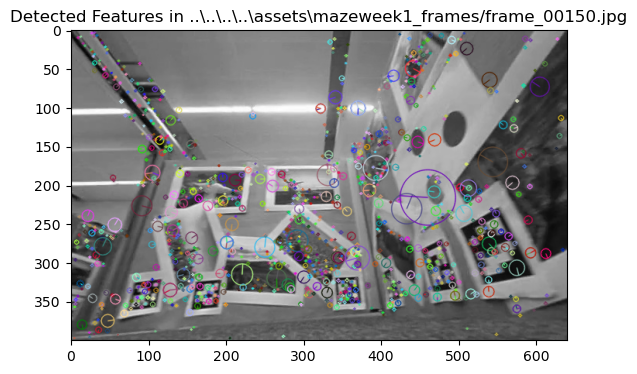

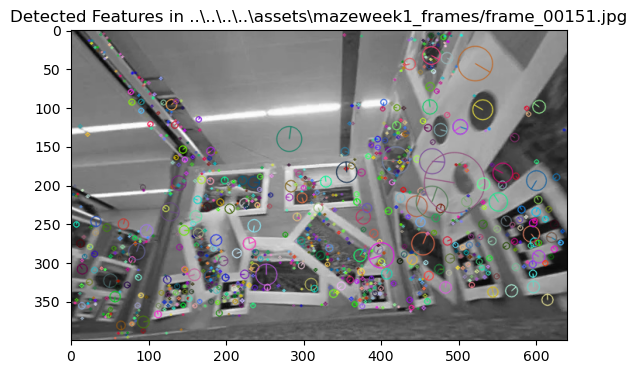

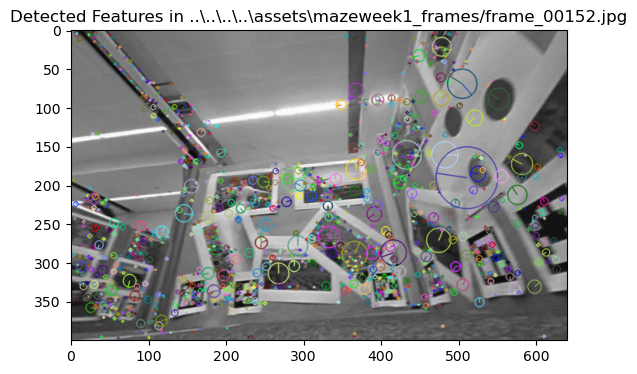

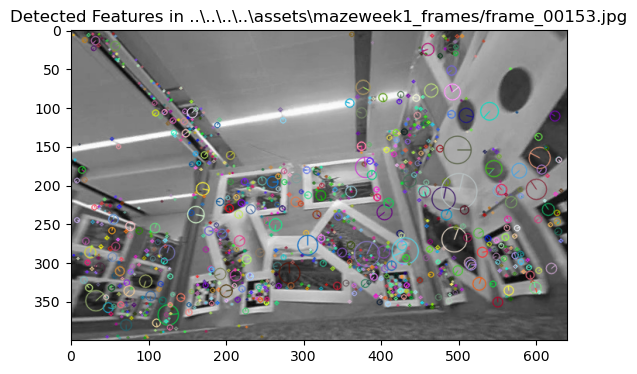

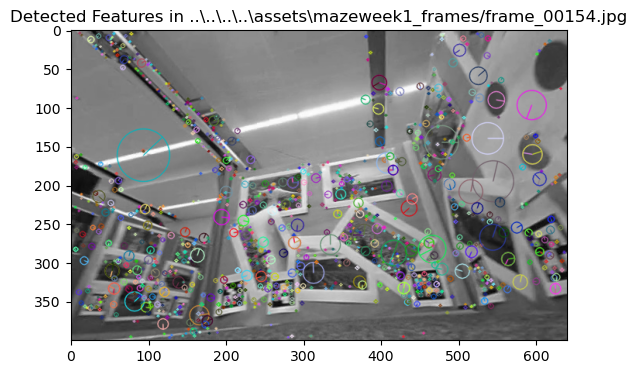

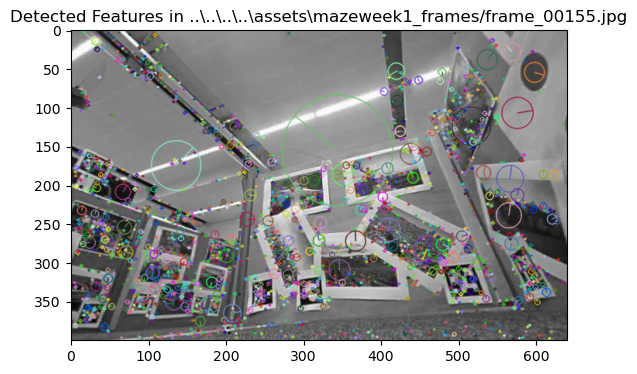

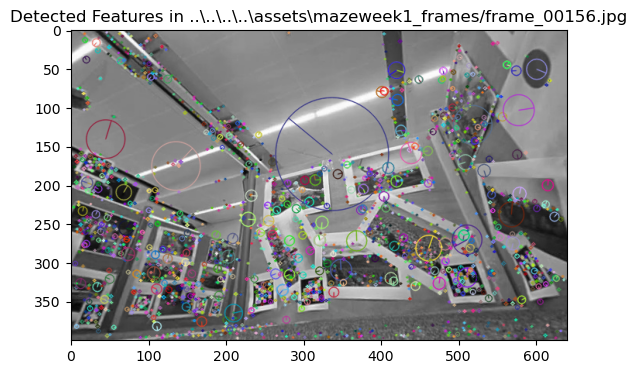

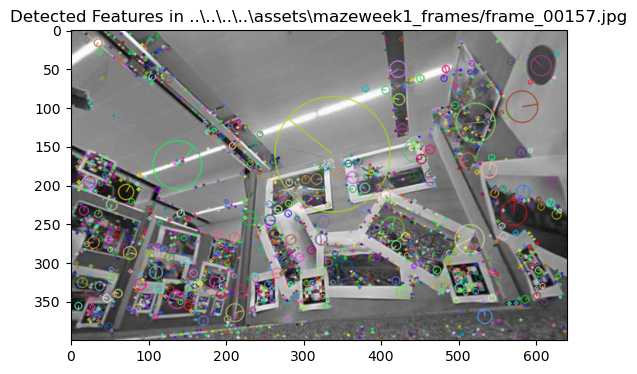

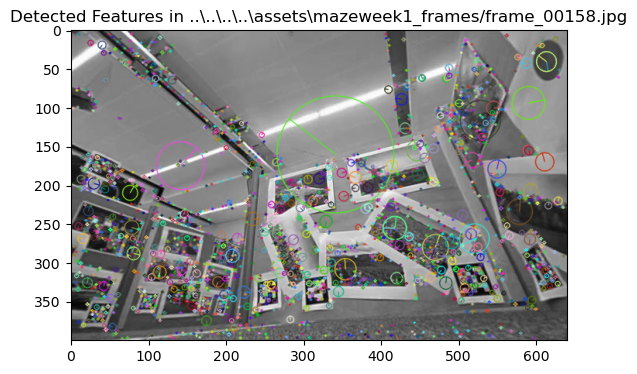

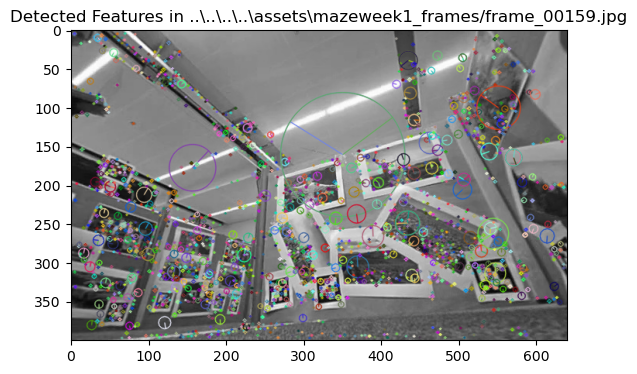

[INFO] Matching features...
[DEBUG] Matches between image 0 and 1: 557


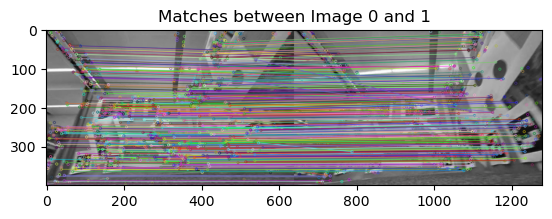

[DEBUG] Matches between image 1 and 2: 565


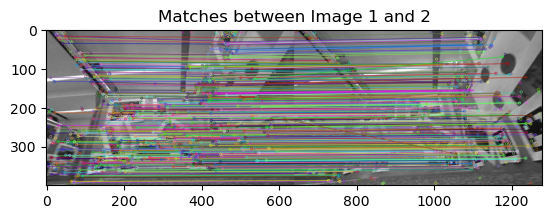

[DEBUG] Matches between image 2 and 3: 660


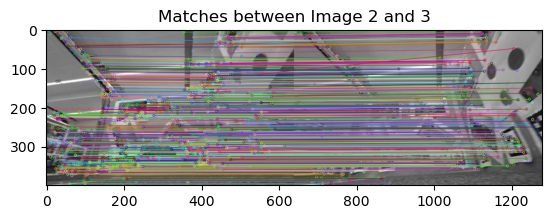

[DEBUG] Matches between image 3 and 4: 598


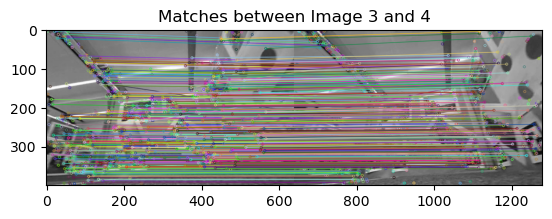

[DEBUG] Matches between image 4 and 5: 431


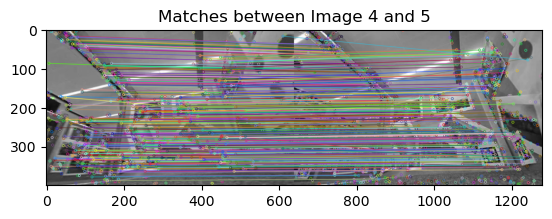

[DEBUG] Matches between image 5 and 6: 1285


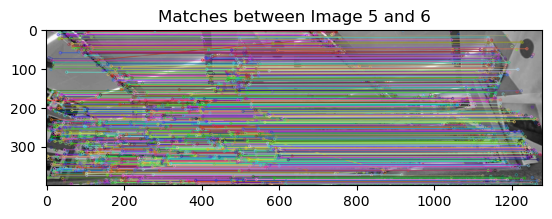

[DEBUG] Matches between image 6 and 7: 1401


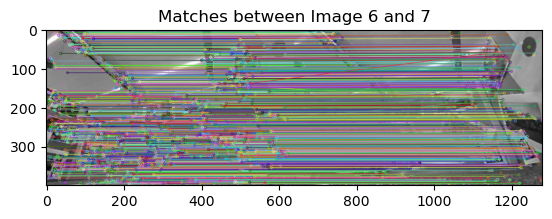

[DEBUG] Matches between image 7 and 8: 1351


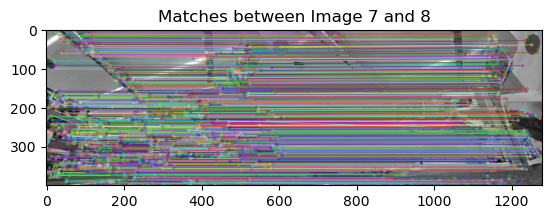

[DEBUG] Matches between image 8 and 9: 1142


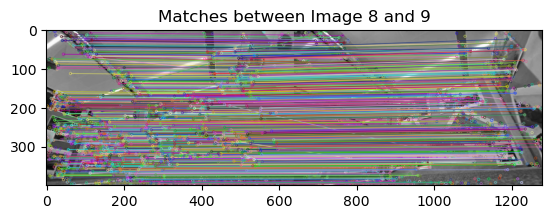

[INFO] Reconstructing 3D structure...
[DEBUG] Global Camera Pose 1:
Rotation:
[[ 9.98958610e-01  4.56254786e-02  1.07497795e-04]
 [-4.56254799e-02  9.98958616e-01  1.00314917e-05]
 [-1.06928157e-04 -1.49256835e-05  9.99999994e-01]]
Translation:
[[0.77984726]
 [0.62596755]
 [0.00169458]]
Triangulated Points (Sample): [[ 7.9074144e-02  1.5732801e-01  2.7308366e-01 ... -2.0148529e+01
  -2.0148529e+01 -2.1063250e+01]
 [ 7.9588747e+00  5.4318690e+00  6.7033381e+00 ... -9.4325676e+00
  -9.4325676e+00 -1.1412665e+01]
 [ 2.0036627e-02  1.9426789e-02  2.0095492e-02 ... -3.6332358e-02
  -3.6332358e-02 -3.7679363e-02]]
[DEBUG] Global Camera Pose 2:
Rotation:
[[ 9.97514472e-01  7.04617140e-02  1.58409207e-04]
 [-7.04617169e-02  9.97514484e-01  1.29435119e-05]
 [-1.57103457e-04 -2.40731251e-05  9.99999987e-01]]
Translation:
[[1.61644213]
 [1.17378644]
 [0.00356205]]
Triangulated Points (Sample): [[-1.19683123e+00 -1.19683123e+00 -9.37904418e-01 ... -5.50318413e+01
  -4.87748833e+01 -7.02915726e+01]

In [81]:
sfm = StructureFromMotion(True)
image_paths = [f"{output_path}/frame_{i:05d}.jpg" for i in range(150, 160)]
points, cams = sfm.run(image_paths)

In [ ]:
plt.plot(np.array([cams[i]["t"][0] for i in range(10)]))
plt.show()

plt.plot(np.array([cams[i]["t"][1] for i in range(10)]))
plt.show()

plt.plot(np.array([cams[i]["t"][2] for i in range(10)]))
plt.show()

In [82]:
a = "26 0 3000 -77.2086639404 -112.445861816 18 1965 -68.4463348389 -101.328918457 7 3151 -44.7545776367 -111.902313232 9 2014 -63.5235900879 -113.902832031 14 1849 -68.2990875244 -96.68359375 15 1864 -69.0671081543 -94.5874633789 17 2066 -67.5582733154 -99.162902832 19 2393 -63.3346557617 -96.6710510254 10 2503 -76.7032623291 -116.896179199 20 2193 -57.383026123 -97.248046875 2 2761 -54.6369934082 -109.321807861 4 2955 -55.6589355469 -110.192596436 6 3273 -66.6369476318 -110.397247314 1 3028 -53.6280517578 -107.810119629 8 2187 -54.807434082 -104.059234619 22 2253 -57.8180541992 -91.4988708496 24 2024 -78.4910888672 -92.0653686523 25 2074 -89.5679931641 -91.4641723633 23 2767 -63.2912902832 -92.614440918 27 1621 -110.936737061 -87.3662414551 28 865 -160.652557373 -85.4683227539 29 1094 -193.846939087 -82.7738342285 31 505 -252.439086914 -71.740447998 32 429 -273.821838379 -68.4057312012 358 1209 -298.420532227 -111.964263916 359 1369 -302.256164551 -114.098693848 0.417711383535 -0.975619206198 -11.2479542809"
a = a.split(" ")
len(a)

108